### create a Handwritten Digit Recognition system using the MNIST dataset with a Neural Network

Installing the library TensorFlow with GPU support and Keras. TensorFlow with GPU support, or tensorflow-gpu, optimizes the TensorFlow machine learning library by tapping into Graphics Processing Units (GPUs), enhancing the efficiency of numerical computations for deep learning tasks.

In [1]:
!pip install tensorflow-gpu keras

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pandas - used to perform data manipulation and analysis

numpy - used to perform a wide variety of mathematical operations on arrays

tqdm.notebook  - progressbar decorator for iterators. Includes a default range iterator printing to stderr.

keras.preprocessing.image - basic preprocessing step for loading the image and converting the image to a numpy array

tensorflow – backend module for the use of Keras

matplotlib - used for data visualization and graphical plotting

%matplotlib - to enable the inline plotting

In [7]:
!unzip Train_UQcUa52.zip

Streaming output truncated to the last 5000 lines.
 extracting: Images/train/55.png     
 extracting: Images/train/550.png    
 extracting: Images/train/5500.png   
 extracting: Images/train/5501.png   
 extracting: Images/train/5502.png   
 extracting: Images/train/5503.png   
 extracting: Images/train/5504.png   
 extracting: Images/train/5505.png   
 extracting: Images/train/5506.png   
 extracting: Images/train/5507.png   
 extracting: Images/train/5508.png   
 extracting: Images/train/5509.png   
 extracting: Images/train/551.png    
 extracting: Images/train/5510.png   
 extracting: Images/train/5511.png   
 extracting: Images/train/5512.png   
 extracting: Images/train/5513.png   
 extracting: Images/train/5514.png   
 extracting: Images/train/5515.png   
 extracting: Images/train/5516.png   
 extracting: Images/train/5517.png   
 extracting: Images/train/5518.png   
 extracting: Images/train/5519.png   
 extracting: Images/train/552.png    
 extracting: Images/train/5520.png   

In [8]:
df = pd.read_csv('train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


 load all the dataset into an array for processing

In [9]:
!pwd

/content


In [11]:
image_path = 'Images/train/'

In [12]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i], target_size=(28,28,1), grayscale=True))
                   for i in tqdm(range(df.shape[0]))
                   ]).astype('float32')

  0%|          | 0/49000 [00:00<?, ?it/s]

 loading images from the directory, resizing them to 28x28 pixels, converting them to grayscale, and then converting the data into a NumPy array with a float32 data type.

In [13]:
y = df['label']

In [14]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


**X.shape**

49000 - The number of samples

The next two dimensions, 28 and 28 - picture size of 28x28 pixels.

1 - The images are in grayscale

**y.shape**

one-dimensional array with 49,000 elements

### Exploratory Data Analysis

4


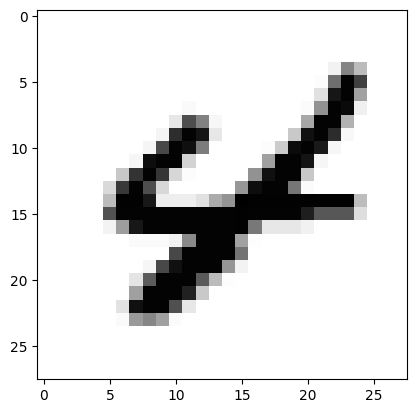

In [15]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

6


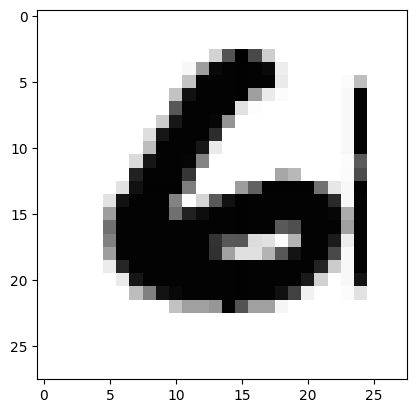

In [16]:
image_index = 12
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

### Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

splits the dataset into training and testing sets (x_train, x_test, y_train, y_test) using the train_test_split function.

**Normalization**

In [18]:
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [19]:
x_train /= 255
x_test /= 255

In [20]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Model Creation

In [21]:
input_shape = (28,28,1)
output_class = 10

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

We define a simple Convolutional Neural Network (CNN) using the Keras library with the following structure:

A convolutional layer with 28 filters and a 3x3 kernel.

A max pooling layer with a 2x2 pool size.

A flattening layer to convert the 2D output to a 1D array.

A dense layer with 128 neurons and ReLU activation.

A dropout layer with a dropout rate of 0.3 to reduce overfitting.

A dense output layer with a softmax activation for multi-class classification.

Finally, the model is compiled using the Adam optimizer, sparse categorical crossentropy loss (suitable for integer-encoded labels), and accuracy as the metric

In [23]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

Fit the training data to the model.

In [24]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1149/1149 [==============================] - 37s 31ms/step - loss: 0.2720 - accuracy: 0.9162 - val_loss: 0.1138 - val_accuracy: 0.9657
Epoch 2/30
1149/1149 [==============================] - 41s 35ms/step - loss: 0.1177 - accuracy: 0.9651 - val_loss: 0.0810 - val_accuracy: 0.9739
Epoch 3/30
1149/1149 [==============================] - 29s 25ms/step - loss: 0.0858 - accuracy: 0.9740 - val_loss: 0.0766 - val_accuracy: 0.9759
Epoch 4/30
1149/1149 [==============================] - 30s 26ms/step - loss: 0.0656 - accuracy: 0.9781 - val_loss: 0.0668 - val_accuracy: 0.9800
Epoch 5/30
1149/1149 [==============================] - 28s 24ms/step - loss: 0.0532 - accuracy: 0.9825 - val_loss: 0.0665 - val_accuracy: 0.9807
Epoch 6/30
1149/1149 [==============================] - 28s 25ms/step - loss: 0.0439 - accuracy: 0.9858 - val_loss: 0.0668 - val_accuracy: 0.9802
Epoch 7/30
1149/1149 [==============================] - 29s 26ms/step - loss: 0.0388 - accuracy: 0.9873 - val_loss: 0.0667 -

Checking whether the model predict correctly

1/1 [==============================] - 0s 37ms/step
predicted output: 1


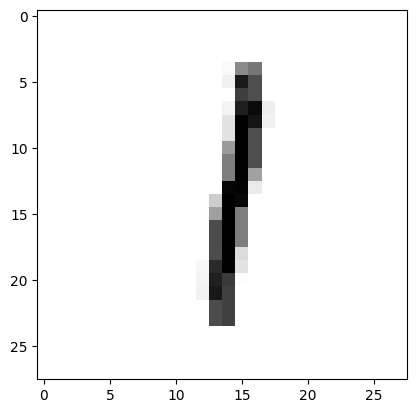

In [46]:
plt.imshow(x_test[10].reshape(28,28),cmap='Greys')
pred = model.predict(x_test[10].reshape(1, 28, 28, 1))
print('predicted output:', pred.argmax())

1/1 [==============================] - 0s 26ms/step
predicted output: 8


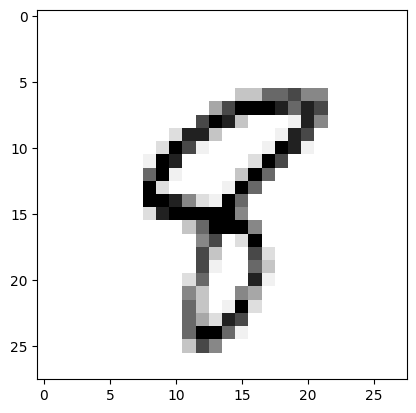

In [47]:
plt.imshow(x_test[100].reshape(28,28),cmap='Greys')
pred = model.predict(x_test[100].reshape(1, 28, 28, 1))
print('predicted output:', pred.argmax())

1/1 [==============================] - 0s 42ms/step
predicted output: 8


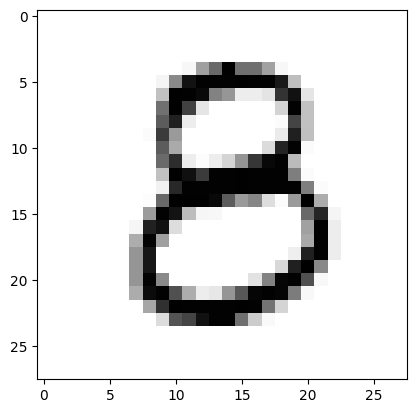

In [48]:
plt.imshow(x_test[20].reshape(28,28),cmap='Greys')
pred = model.predict(x_test[20].reshape(1, 28, 28, 1))
print('predicted output:', pred.argmax())

1/1 [==============================] - 0s 43ms/step
predicted output: 5


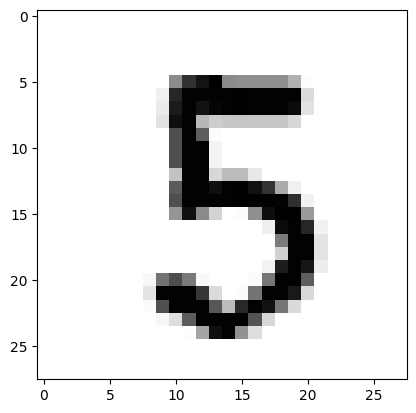

In [49]:
plt.imshow(x_test[12].reshape(28,28),cmap='Greys')
pred = model.predict(x_test[12].reshape(1, 28, 28, 1))
print('predicted output:', pred.argmax())